In [62]:
import pandas as pd

series = pd.Series(['BMW', 'Toyota', 'Honda'])
color = pd.Series(["Red", "Blue", "Green"])

# İki Serinin birleştirilmesini sağlar.
car_data = pd.DataFrame({"Car Frame":series, "Color":color}) 
car_data

,Car Frame,Color
0,BMW,Red
1,Toyota,Blue
2,Honda,Green


- Belirli bir csv dosyayı içe aktarmayı sağlar. İnternet adresinden veri çekilebilir. Github kısmından veri çekilmek için "raw" kısmına basılıp link kopyalanır

- Belili bir değişiklik yapıldıktan sonra faklı çıktı olarak kaydedilebilir. Aynı şekilde `to_dict`, `to_excel`... farklı veri dosyasına çevrile bilir. `csv` dosyasının geçerliliği fazla olduğu için kullanılır. 
- `index = False` sayesinde satır sayıları tekrar alınmaz 

In [63]:
car_sales = pd.read_csv("car_data.csv")  
car_sales_1 = pd.read_csv("https://raw.githubusercontent.com/serkanMzlm/tutorial/main/python/modules/car_data.csv")
car_sales.to_csv("export_car_sales.csv", index = False) 

In [64]:
car_sales = pd.read_csv("car_data.csv")
car_sales.dtypes  # Veri türlerini verir
car_sales.columns # Sütünları verir
car_sales.index   # Satır bilgise verir. (start, stop, step)
car_sales.info()  # Veri hakkında bilgi verir
car_sales.describe();  # Sayısal sütünlar hakkında bilgi verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          19 non-null     object
 1   Colour        19 non-null     object
 2   Odometer(km)  19 non-null     int64 
 3   Doors         19 non-null     int64 
 4   Price         19 non-null     object
dtypes: int64(2), object(3)
memory usage: 888.0+ bytes


In [65]:
car_sales.head()    # İlk 5 satır
car_sales.tail()    # Son 5 satır
car_sales.tail(3)  # Son 3 satır
car_sales["Doors"].sum(), car_sales["Doors"].mean(), len(car_sales)


(73, 3.8421052631578947, 19)

In [66]:
car_sales["Colour"] # Ya da car_sales.Colour
car_sales[car_sales["Make"] == "Toyota"] # Belirli bir koşul doğru sonuçlarını verir sadece
car_sales[car_sales["Odometer(km)"] > 12041242]

# İndex isteğe gibi düzenlenebilmesini sağlar.
animals = pd.Series(["Dog", "Cat", "Bird", "Panda"],
                    index = [1, 3, 2, 2]) 

animals.loc[2]  # Belirli bir index değerini verir.
animals.loc[:2] # Belirli index'e kadar bütün değeleri alır
animals.iloc[1] # Pos göre döndürür. (ilk değer 0 olarak sayılır)

'Cat'

crosstab iki veya daha fazla faktörün kesişimini inceleyerek bir tablo oluşturur. Bu tablo, kategorik değişkenlerin birbirleriyle nasıl ilişkili olduğunu, her bir kombinasyonun gözlemlenen sayısını ve/veya yüzdesini içerir

In [67]:
# Veri düzenlemesi yapıldı
car_sales["Price"] = car_sales["Price"].str.replace('[\$\.\,]', '', regex=True).astype(int)
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,2,3,4
Make,,,
BMW,0,0,3
Honda,0,0,7
Nissan,0,1,2
Toyota,1,0,5


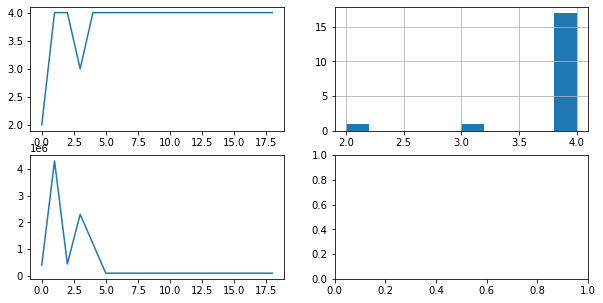

In [68]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

car_sales["Doors"].plot(ax=ax[0, 0])
car_sales["Price"].plot(ax=ax[1, 0])
car_sales["Doors"].hist(ax=ax[0, 1])
plt.show()

In [71]:
seats_column = pd.Series([5, 5, 5, 12])
car_sales["Seats"] = seats_column # Yeni bir sutün ekler

In [77]:
# NaN kısımlara o sutün ortalaması ile değiştirir. inplace
# 'True' yapmak o verinin üstünde işlem yapmamızı sağlar.
car_sales["Doors"] = car_sales["Doors"].fillna(car_sales["Doors"].mean(), 
                                                            inplace = False)

# NaN kısımları o satırları siler
car_sales["Seats"] = car_sales["Seats"].dropna() 
car_sales["copy"] = 12.9
car_sales[:2]

,Make,Colour,Odometer(km),Doors,Price,Seats,copy
0,Toyota,White,15000,2,400000,5.0,12.9
1,BMW,Red,35000,4,4300000,5.0,12.9


In [78]:
car_sales = car_sales.drop("copy", axis= 1) # Belirli bir sutün siler
car_sales[:2]

,Make,Colour,Odometer(km),Doors,Price,Seats
0,Toyota,White,15000,2,400000,5.0
1,BMW,Red,35000,4,4300000,5.0


Data set karıştırmak için kullanılır. "frac" yüzde kaçı karıştırmak istediğimizi belirtir. 1 = 100, 0.5 = 50 bu bizim büyük verilerin belli karıştırılıp kullanmak istediğimizde 02 yazarak verinin %20 alır ve karıştırır car_sales.reset_index() tekrardan düzenler

In [80]:
car_sales.sample(frac=1)[:2]

,Make,Colour,Odometer(km),Doors,Price,Seats
1,BMW,Red,35000,4,4300000,5.0
13,Honda,White,46000,4,100000,NaN


In [82]:
car_sales["Doors"] = car_sales["Doors"].apply(lambda x: x -1)
car_sales[:5]

,Make,Colour,Odometer(km),Doors,Price,Seats
0,Toyota,White,15000,0,400000,5.0
1,BMW,Red,35000,2,4300000,5.0
2,Toyota,Blue,15080,2,445000,5.0
3,Nissan,White,18050,1,2300000,12.0
4,Toyota,Green,95000,2,1200000,NaN


# Numpy 

In [83]:
import numpy as np
data = np.random.randint(1, 10, (5, 3))
weekly_sales = pd.DataFrame(data, 
                            index=["Mon", "Tues", "Wed", "Thurs", "Fri"],
                            columns=["Almond", "Peanut", "Canhew"])
print(weekly_sales)

prices = np.array([10, 23, 3])
butter_prices = pd.DataFrame(prices.reshape(1, 3),
                             index=["Price"],
                             columns=["Almond", "Peanut", "Canhew"])
total_sales = prices.dot(data.T) 
total_sales

       Almond  Peanut  Canhew
Mon         1       6       5
Tues        4       9       3
Wed         4       5       1
Thurs       9       4       5
Fri         3       2       2


array([163, 256, 158, 197,  82])

In [84]:
weekly_sales["Total ($)"] = total_sales.T
weekly_sales

,Almond,Peanut,Canhew,Total ($)
Mon,1,6,5,163
Tues,4,9,3,256
Wed,4,5,1,158
Thurs,9,4,5,197
Fri,3,2,2,82
